In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5177279


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5177279/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5177279/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [10]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

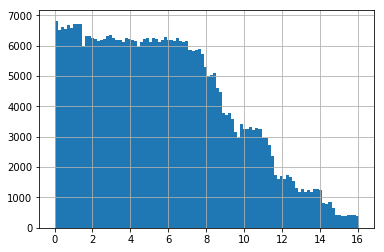

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [50]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [51]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [52]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [53]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [54]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [55]:
qdf=qdf[~qdf['index'].isin({0,16})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((410717, 1), (410717, 100), (410717,))

In [56]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 29606, 2: 36381, 3: 22721, 4: 32572, 5: 20661, 6: 18112, 7: 41320, 8: 20285, 9: 24722, 10: 29316, 11: 28282, 12: 22648, 13: 21974, 14: 37848, 15: 24269}'

In [57]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [21]:
import utils
n_thread= utils.get_num_thread()
n_thread

3

In [22]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [23]:
testX=testdf.values
testX.shape

(2624, 100)

In [24]:
trainX=datadf.values
trainX.shape, qdf.shape

((410717, 100), (410717, 1))

In [25]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a

CPU times: user 15min 49s, sys: 4min 17s, total: 20min 7s
Wall time: 6min 42s


In [58]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 347287, 2624, 3000)

In [59]:
qdf.iloc[topidxs].head()

index
index                    
quake_07_o41253987      7
quake_07_o41252602      7
quake_07_o41080020      7
quake_07_o41253622      7
quake_07_o41083194      7

In [60]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))

In [89]:
idxdf.shape

(3000, 2624)

In [74]:
idxdf.head()

0     1     2     3     4     5     6     7     8     9     ...  2614  \
0     7    14    13     4     7     9    14     8     9     7  ...    15   
1     7    14    13     4     7     9     7    10     5     7  ...    15   
2     7    14    13     4     7     9    14    13    10     7  ...    15   
3     7    14    13     4     7     9    14    10     3    14  ...    15   
4     7    14    13     4    15     9    14    13     9     7  ...    15   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0    14    14    15    15    11    15    15     8    15  
1    14    14    15    15    15    15    15     8    15  
2    14    10    15     1    11    15    15     8    15  
3    14    10    15     1     1    15    15     8     1  
4    14     1    15     1    12    15    15     8    15  

[5 rows x 2624 columns]

In [99]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:1000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.sort_index(ascending=False).cumsum(0)/len(testX),2))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 


0                                                                    \
qno      1     2     3     4     5     6     7     8     9     10    11    12   
index                                                                           
0.0    0.59  0.91  0.90  0.75  0.71  0.64  0.14  0.79  0.73  0.55  0.79  0.90   
0.1    0.32  0.06  0.07  0.20  0.25  0.28  0.31  0.19  0.23  0.33  0.19  0.09   
0.2    0.08  0.03  0.02  0.04  0.04  0.08  0.30  0.02  0.04  0.11  0.01  0.01   
0.3    0.01  0.00  0.00  0.01  0.00  0.01  0.16  0.00  0.01  0.02  0.00  0.00   
0.4    0.00  0.00   NaN  0.00   NaN  0.00  0.07   NaN   NaN  0.00   NaN   NaN   
0.5     NaN   NaN   NaN   NaN   NaN   NaN  0.02   NaN   NaN   NaN   NaN   NaN   
0.6     NaN  0.00   NaN   NaN   NaN   NaN  0.01   NaN   NaN   NaN   NaN   NaN   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                         
qno      13    14    15  
index                    
0.0    0.82  0.24  0.41  
0.1    0.16  0.28  0.24  
0.2    0.01  0.16  0.09  
0.3     NaN  0.08  0.05  
0.4     NaN  0.06  0.04  
0.5     NaN  0.04  0.03  
0.6     NaN  0.04  0.02  
0.7     NaN  0.05  0.04  
0.8     NaN  0.04  0.04  
0.9     NaN  0.01  0.02  
1.0     NaN   NaN  0.01

0                                                                    \
qno      1     2     3     4     5     6     7     8     9     10    11    12   
index                                                                           
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.6     NaN  0.00   NaN   NaN   NaN   NaN  0.01   NaN   NaN   NaN   NaN   NaN   
0.5     NaN   NaN   NaN   NaN   NaN   NaN  0.03   NaN   NaN   NaN   NaN   NaN   
0.4    0.00  0.00   NaN  0.00   NaN  0.00  0.09   NaN   NaN  0.00   NaN   NaN   
0.3    0.01  0.00  0.00  0.01  0.00  0.01  0.25  0.00  0.01  0.02  0.00  0.00   
0.2    0.09  0.03  0.02  0.06  0.04  0.08  0.56  0.02  0.04  0.12  0.01  0.01   
0.1    0.41  0.09  0.10  0.25  0.29  0.36  0.86  0.21  0.27  0.45  0.21  0.10   
0.0    1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00   

                         
qno      13    14    15  
index                    
1.0     NaN   NaN  0.01  
0.9     NaN  0.01  0.04  
0.8     NaN  0.05  0.08  
0.7     NaN  0.10  0.12  
0.6     NaN  0.14  0.14  
0.5     NaN  0.18  0.17  
0.4     NaN  0.24  0.21  
0.3     NaN  0.32  0.26  
0.2    0.01  0.48  0.35  
0.1    0.18  0.76  0.59  
0.0    1.00  1.00  1.00

In [97]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:2000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 


0                                                                    \
qno      1     2     3     4     5     6     7     8     9     10    11    12   
index                                                                           
0.0    0.56  0.91  0.90  0.74  0.69  0.60  0.10  0.77  0.71  0.51  0.79  0.90   
0.1    0.37  0.06  0.08  0.21  0.28  0.32  0.32  0.21  0.26  0.38  0.20  0.09   
0.2    0.06  0.03  0.01  0.04  0.03  0.07  0.34  0.01  0.03  0.10  0.01  0.01   
0.3    0.00  0.00   NaN  0.01   NaN  0.00  0.18   NaN  0.00  0.01  0.00   NaN   
0.4     NaN  0.00   NaN   NaN   NaN   NaN  0.05   NaN   NaN  0.00   NaN   NaN   
0.5     NaN  0.00   NaN   NaN   NaN   NaN  0.01   NaN   NaN   NaN   NaN   NaN   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                         
qno      13    14    15  
index                    
0.0    0.83  0.22  0.39  
0.1    0.16  0.30  0.28  
0.2    0.01  0.17  0.09  
0.3     NaN  0.07  0.05  
0.4     NaN  0.07  0.04  
0.5     NaN  0.05  0.02  
0.6     NaN  0.04  0.03  
0.7     NaN  0.06  0.05  
0.8     NaN  0.02  0.04  
0.9     NaN  0.00  0.02  
1.0     NaN   NaN  0.01

0                                                                    \
qno      1     2     3     4     5     6     7     8     9     10    11    12   
index                                                                           
0.0    0.56  0.91  0.90  0.74  0.69  0.60  0.10  0.77  0.71  0.51  0.79  0.90   
0.1    0.93  0.97  0.99  0.95  0.97  0.92  0.41  0.99  0.97  0.89  0.99  0.99   
0.2    1.00  1.00  1.00  0.99  1.00  1.00  0.76  1.00  1.00  0.99  1.00  1.00   
0.3    1.00  1.00   NaN  1.00   NaN  1.00  0.94   NaN  1.00  1.00  1.00   NaN   
0.4     NaN  1.00   NaN   NaN   NaN   NaN  0.99   NaN   NaN  1.00   NaN   NaN   
0.5     NaN  1.00   NaN   NaN   NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                         
qno      13    14    15  
index                    
0.0    0.83  0.22  0.39  
0.1    0.99  0.51  0.66  
0.2    1.00  0.68  0.75  
0.3     NaN  0.75  0.80  
0.4     NaN  0.82  0.84  
0.5     NaN  0.87  0.86  
0.6     NaN  0.92  0.89  
0.7     NaN  0.98  0.94  
0.8     NaN  1.00  0.98  
0.9     NaN  1.00  0.99  
1.0     NaN   NaN  1.00

In [98]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:3000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))   

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 


0                                                                    \
qno      1     2     3     4     5     6     7     8     9     10    11    12   
index                                                                           
0.0    0.54  0.91  0.90  0.73  0.68  0.57  0.08  0.77  0.71  0.49  0.79  0.91   
0.1    0.41  0.07  0.09  0.22  0.30  0.35  0.31  0.22  0.27  0.41  0.21  0.09   
0.2    0.05  0.02  0.01  0.04  0.02  0.07  0.39  0.01  0.03  0.10  0.01  0.00   
0.3    0.00  0.00   NaN  0.00   NaN  0.00  0.17   NaN   NaN  0.01   NaN   NaN   
0.4     NaN  0.00   NaN   NaN   NaN   NaN  0.04   NaN   NaN   NaN   NaN   NaN   
0.5     NaN  0.00   NaN   NaN   NaN   NaN  0.00   NaN   NaN   NaN   NaN   NaN   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                         
qno      13    14    15  
index                    
0.0    0.83  0.19  0.37  
0.1    0.17  0.31  0.30  
0.2    0.00  0.17  0.08  
0.3     NaN  0.07  0.05  
0.4     NaN  0.07  0.04  
0.5     NaN  0.06  0.02  
0.6     NaN  0.06  0.03  
0.7     NaN  0.06  0.04  
0.8     NaN  0.01  0.04  
0.9     NaN   NaN  0.01

0                                                                    \
qno      1     2     3     4     5     6     7     8     9     10    11    12   
index                                                                           
0.0    0.54  0.91  0.90  0.73  0.68  0.57  0.08  0.77  0.71  0.49  0.79  0.91   
0.1    0.95  0.97  0.99  0.95  0.98  0.92  0.39  0.99  0.97  0.90  0.99  1.00   
0.2    1.00  1.00  1.00  1.00  1.00  1.00  0.78  1.00  1.00  0.99  1.00  1.00   
0.3    1.00  1.00   NaN  1.00   NaN  1.00  0.95   NaN   NaN  1.00   NaN   NaN   
0.4     NaN  1.00   NaN   NaN   NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN   
0.5     NaN  1.00   NaN   NaN   NaN   NaN  1.00   NaN   NaN   NaN   NaN   NaN   
0.6     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                         
qno      13    14    15  
index                    
0.0    0.83  0.19  0.37  
0.1    1.00  0.51  0.67  
0.2    1.00  0.68  0.75  
0.3     NaN  0.75  0.81  
0.4     NaN  0.82  0.85  
0.5     NaN  0.88  0.87  
0.6     NaN  0.94  0.90  
0.7     NaN  0.99  0.94  
0.8     NaN  1.00  0.99  
0.9     NaN   NaN  1.00

In [27]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

1      434542
2      111123
3      106863
4      283817
5      292276
6      446517
7     1422903
8      218241
9      270841
10     518211
11     207433
12     106298
13     180795
14    1773369
15    1498771
Name: index, dtype: int64

In [28]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

1     26552
2     21878
3     16716
4     24330
5     19662
6     14688
7     40471
8     17869
9     21175
10    27893
11    22893
12    16119
13    18164
14    35378
15    23499
Name: index, dtype: int64

In [29]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((347287, 1), (347287, 100), (347287,))

In [30]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [31]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [32]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  1 1 (nan, nan)
valid quake 2 train quake 1
(26552, 100) (26552,) (21878, 100) (21878,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.0749	valid_1's l1: 3.09121
[100]	training's l1: 0.727656	valid_1's l1: 2.99182
[150]	training's l1: 0.566127	valid_1's l1: 2.94155
[200]	training's l1: 0.478314	valid_1's l1: 2.9206
[250]	training's l1: 0.425635	valid_1's l1: 2.91105
[300]	training's l1: 0.390299	valid_1's l1: 2.90666
[350]	training's l1: 0.364092	valid_1's l1: 2.90649
[400]	training's l1: 0.342511	valid_1's l1: 2.91369
[450]	training's l1: 0.325061	valid_1's l1: 2.91472
[500]	training's l1: 0.310629	valid_1's l1: 2.91656
Early stopping, best iteration is:
[323]	training's l1: 0.377483	valid_1's l1: 2.90545
quake  1 2 (2.9054486989706882, 323)
valid quake 3 train quake 1
(26552, 100) (26552,) (16716, 100) (16716,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.0749	valid_1's l1: 1.79692
[100]	training's l1

[300]	training's l1: 0.390299	valid_1's l1: 2.08425
[350]	training's l1: 0.364092	valid_1's l1: 2.07799
[400]	training's l1: 0.342511	valid_1's l1: 2.07054
[450]	training's l1: 0.325061	valid_1's l1: 2.0669
[500]	training's l1: 0.310629	valid_1's l1: 2.06411
[550]	training's l1: 0.297905	valid_1's l1: 2.06171
[600]	training's l1: 0.287345	valid_1's l1: 2.05895
[650]	training's l1: 0.277811	valid_1's l1: 2.05722
[700]	training's l1: 0.269947	valid_1's l1: 2.05523
[750]	training's l1: 0.262311	valid_1's l1: 2.05299
[800]	training's l1: 0.255477	valid_1's l1: 2.05053
[850]	training's l1: 0.249129	valid_1's l1: 2.04868
[900]	training's l1: 0.243591	valid_1's l1: 2.04654
[950]	training's l1: 0.238441	valid_1's l1: 2.04534
[1000]	training's l1: 0.233501	valid_1's l1: 2.04293
[1050]	training's l1: 0.22892	valid_1's l1: 2.04086
[1100]	training's l1: 0.224495	valid_1's l1: 2.03917
[1150]	training's l1: 0.220624	valid_1's l1: 2.03706
[1200]	training's l1: 0.216759	valid_1's l1: 2.03552
[1250]	tr

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.23925	valid_1's l1: 2.9879
[100]	training's l1: 0.80746	valid_1's l1: 2.99207
[150]	training's l1: 0.622171	valid_1's l1: 3.05921
[200]	training's l1: 0.529122	valid_1's l1: 3.10087
[250]	training's l1: 0.474912	valid_1's l1: 3.11358
Early stopping, best iteration is:
[62]	training's l1: 1.08979	valid_1's l1: 2.92903
quake  2 10 (2.929025915643646, 62)
valid quake 11 train quake 2
(21878, 100) (21878,) (22893, 100) (22893,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.23925	valid_1's l1: 2.87291
[100]	training's l1: 0.80746	valid_1's l1: 2.73337
[150]	training's l1: 0.622171	valid_1's l1: 2.71318
[200]	training's l1: 0.529122	valid_1's l1: 2.7134
[250]	training's l1: 0.474912	valid_1's l1: 2.70685
[300]	training's l1: 0.439471	valid_1's l1: 2.70265
[350]	training's l1: 0.411063	valid_1's l1: 2.69511
[400]	training's l1: 0.388295	valid_1's l1: 2.68806
[450]	traini

quake  3 2 (3.7223054724183857, 454)
quake  3 3 (nan, nan)
valid quake 4 train quake 3
(16716, 100) (16716,) (24330, 100) (24330,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.801937	valid_1's l1: 2.40183
[100]	training's l1: 0.507855	valid_1's l1: 2.4246
[150]	training's l1: 0.353556	valid_1's l1: 2.44817
[200]	training's l1: 0.262096	valid_1's l1: 2.46588
Early stopping, best iteration is:
[43]	training's l1: 0.868991	valid_1's l1: 2.39782
quake  3 4 (2.397819927402922, 43)
valid quake 5 train quake 3
(16716, 100) (16716,) (19662, 100) (19662,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.801937	valid_1's l1: 1.0445
[100]	training's l1: 0.507855	valid_1's l1: 1.05241
[150]	training's l1: 0.353556	valid_1's l1: 1.08242
[200]	training's l1: 0.262096	valid_1's l1: 1.10773
[250]	training's l1: 0.215154	valid_1's l1: 1.12363
Early stopping, best iteration is:
[70]	training's l1: 0.654735	valid_1's l1: 1.03769


Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.11077	valid_1's l1: 2.60209
[100]	training's l1: 0.750191	valid_1's l1: 2.45188
[150]	training's l1: 0.583984	valid_1's l1: 2.38278
[200]	training's l1: 0.498279	valid_1's l1: 2.34303
[250]	training's l1: 0.448368	valid_1's l1: 2.31902
[300]	training's l1: 0.413248	valid_1's l1: 2.3055
[350]	training's l1: 0.387179	valid_1's l1: 2.29479
[400]	training's l1: 0.365536	valid_1's l1: 2.29124
[450]	training's l1: 0.346303	valid_1's l1: 2.28866
[500]	training's l1: 0.330622	valid_1's l1: 2.28718
[550]	training's l1: 0.317258	valid_1's l1: 2.28768
[600]	training's l1: 0.305508	valid_1's l1: 2.28772
[650]	training's l1: 0.294968	valid_1's l1: 2.28797
Early stopping, best iteration is:
[499]	training's l1: 0.330935	valid_1's l1: 2.28712
quake  4 2 (2.287117132452816, 499)
valid quake 3 train quake 4
(24330, 100) (24330,) (16716, 100) (16716,)
Training until validation scores don't improve for 200 rounds.
[50]	t

Early stopping, best iteration is:
[65]	training's l1: 0.659178	valid_1's l1: 2.58628
quake  5 1 (2.5862806480444736, 65)
valid quake 2 train quake 5
(19662, 100) (19662,) (21878, 100) (21878,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.760401	valid_1's l1: 4.44812
[100]	training's l1: 0.497903	valid_1's l1: 4.51235
[150]	training's l1: 0.355221	valid_1's l1: 4.56902
[200]	training's l1: 0.277254	valid_1's l1: 4.61809
Early stopping, best iteration is:
[35]	training's l1: 0.900948	valid_1's l1: 4.44088
quake  5 2 (4.4408781335578675, 35)
valid quake 3 train quake 5
(19662, 100) (19662,) (16716, 100) (16716,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.760401	valid_1's l1: 1.25802
[100]	training's l1: 0.497903	valid_1's l1: 1.19839
[150]	training's l1: 0.355221	valid_1's l1: 1.18739
[200]	training's l1: 0.277254	valid_1's l1: 1.19508
[250]	training's l1: 0.235628	valid_1's l1: 1.20355
[300]	training's l1:

[700]	training's l1: 0.12371	valid_1's l1: 2.66419
[750]	training's l1: 0.120103	valid_1's l1: 2.66375
[800]	training's l1: 0.116785	valid_1's l1: 2.66364
[850]	training's l1: 0.113694	valid_1's l1: 2.66358
[900]	training's l1: 0.110855	valid_1's l1: 2.66332
[950]	training's l1: 0.108275	valid_1's l1: 2.66285
[1000]	training's l1: 0.10577	valid_1's l1: 2.66285
[1050]	training's l1: 0.103416	valid_1's l1: 2.66227
[1100]	training's l1: 0.101242	valid_1's l1: 2.6621
[1150]	training's l1: 0.0992673	valid_1's l1: 2.66175
[1200]	training's l1: 0.0973986	valid_1's l1: 2.66159
[1250]	training's l1: 0.0956063	valid_1's l1: 2.66119
[1300]	training's l1: 0.0938253	valid_1's l1: 2.66101
[1350]	training's l1: 0.092175	valid_1's l1: 2.66121
[1400]	training's l1: 0.0906412	valid_1's l1: 2.66065
[1450]	training's l1: 0.0891178	valid_1's l1: 2.66026
[1500]	training's l1: 0.0876357	valid_1's l1: 2.66025
quake  6 1 (2.660245917552003, 0)
valid quake 2 train quake 6
(14688, 100) (14688,) (21878, 100) (218

[500]	training's l1: 0.143898	valid_1's l1: 0.849877
[550]	training's l1: 0.137689	valid_1's l1: 0.850847
[600]	training's l1: 0.132448	valid_1's l1: 0.851336
[650]	training's l1: 0.127975	valid_1's l1: 0.851502
[700]	training's l1: 0.12371	valid_1's l1: 0.852467
Early stopping, best iteration is:
[509]	training's l1: 0.142765	valid_1's l1: 0.848977
quake  6 8 (0.8489767178044669, 509)
valid quake 9 train quake 6
(14688, 100) (14688,) (21175, 100) (21175,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.699432	valid_1's l1: 1.8869
[100]	training's l1: 0.457809	valid_1's l1: 1.78843
[150]	training's l1: 0.328548	valid_1's l1: 1.73606
[200]	training's l1: 0.255071	valid_1's l1: 1.70367
[250]	training's l1: 0.212791	valid_1's l1: 1.68266
[300]	training's l1: 0.187289	valid_1's l1: 1.66783
[350]	training's l1: 0.171238	valid_1's l1: 1.65584
[400]	training's l1: 0.15974	valid_1's l1: 1.6482
[450]	training's l1: 0.151137	valid_1's l1: 1.64519
[500]	traini

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.699432	valid_1's l1: 2.7115
[100]	training's l1: 0.457809	valid_1's l1: 2.84163
[150]	training's l1: 0.328548	valid_1's l1: 2.9134
[200]	training's l1: 0.255071	valid_1's l1: 2.94902
Early stopping, best iteration is:
[17]	training's l1: 1.08102	valid_1's l1: 2.47666
quake  6 15 (2.476657187884905, 17)
valid quake 1 train quake 7
(40471, 100) (40471,) (26552, 100) (26552,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.63035	valid_1's l1: 3.29481
[100]	training's l1: 1.20756	valid_1's l1: 3.30332
[150]	training's l1: 1.01977	valid_1's l1: 3.35463
[200]	training's l1: 0.909705	valid_1's l1: 3.361
Early stopping, best iteration is:
[9]	training's l1: 3.01978	valid_1's l1: 3.17332
quake  7 1 (3.1733246241383073, 9)
valid quake 2 train quake 7
(40471, 100) (40471,) (21878, 100) (21878,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 

[200]	training's l1: 0.909705	valid_1's l1: 4.94838
Early stopping, best iteration is:
[1]	training's l1: 3.90436	valid_1's l1: 4.19474
quake  7 13 (4.194735047302344, 1)
valid quake 14 train quake 7
(40471, 100) (40471,) (35378, 100) (35378,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.63035	valid_1's l1: 2.45997
[100]	training's l1: 1.20756	valid_1's l1: 2.36944
[150]	training's l1: 1.01977	valid_1's l1: 2.39312
[200]	training's l1: 0.909705	valid_1's l1: 2.40169
[250]	training's l1: 0.834628	valid_1's l1: 2.39146
[300]	training's l1: 0.776778	valid_1's l1: 2.3954
Early stopping, best iteration is:
[100]	training's l1: 1.20756	valid_1's l1: 2.36944
quake  7 14 (2.369444894052619, 100)
valid quake 15 train quake 7
(40471, 100) (40471,) (23499, 100) (23499,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.63035	valid_1's l1: 5.2876
[100]	training's l1: 1.20756	valid_1's l1: 5.40162
[150]	training's l1: 1.0197

[150]	training's l1: 0.346491	valid_1's l1: 4.66062
[200]	training's l1: 0.265666	valid_1's l1: 4.69409
Early stopping, best iteration is:
[13]	training's l1: 1.26648	valid_1's l1: 4.21421
quake  8 14 (4.2142062286298545, 13)
valid quake 15 train quake 8
(17869, 100) (17869,) (23499, 100) (23499,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.749407	valid_1's l1: 1.84389
[100]	training's l1: 0.488425	valid_1's l1: 1.80381
[150]	training's l1: 0.346491	valid_1's l1: 1.78874
[200]	training's l1: 0.265666	valid_1's l1: 1.77501
[250]	training's l1: 0.222613	valid_1's l1: 1.76588
[300]	training's l1: 0.198593	valid_1's l1: 1.75916
[350]	training's l1: 0.18213	valid_1's l1: 1.75583
[400]	training's l1: 0.171165	valid_1's l1: 1.75169
[450]	training's l1: 0.162346	valid_1's l1: 1.74872
[500]	training's l1: 0.155278	valid_1's l1: 1.74706
[550]	training's l1: 0.149311	valid_1's l1: 1.74627
[600]	training's l1: 0.144328	valid_1's l1: 1.7449
[650]	training's 

[550]	training's l1: 0.193636	valid_1's l1: 1.7799
[600]	training's l1: 0.186401	valid_1's l1: 1.77956
[650]	training's l1: 0.180187	valid_1's l1: 1.77881
[700]	training's l1: 0.174681	valid_1's l1: 1.77856
[750]	training's l1: 0.169708	valid_1's l1: 1.7784
[800]	training's l1: 0.165344	valid_1's l1: 1.77784
[850]	training's l1: 0.16103	valid_1's l1: 1.77751
[900]	training's l1: 0.157233	valid_1's l1: 1.77698
[950]	training's l1: 0.153769	valid_1's l1: 1.77659
[1000]	training's l1: 0.150495	valid_1's l1: 1.77612
[1050]	training's l1: 0.147484	valid_1's l1: 1.77607
[1100]	training's l1: 0.144548	valid_1's l1: 1.77601
[1150]	training's l1: 0.141975	valid_1's l1: 1.77551
[1200]	training's l1: 0.139528	valid_1's l1: 1.77522
[1250]	training's l1: 0.137088	valid_1's l1: 1.77468
[1300]	training's l1: 0.134833	valid_1's l1: 1.77469
[1350]	training's l1: 0.132753	valid_1's l1: 1.7743
[1400]	training's l1: 0.13071	valid_1's l1: 1.77383
[1450]	training's l1: 0.128696	valid_1's l1: 1.77319
[1500]	

[450]	training's l1: 0.338247	valid_1's l1: 1.54598
[500]	training's l1: 0.322896	valid_1's l1: 1.54616
[550]	training's l1: 0.309089	valid_1's l1: 1.54643
[600]	training's l1: 0.297326	valid_1's l1: 1.54692
[650]	training's l1: 0.28653	valid_1's l1: 1.54803
Early stopping, best iteration is:
[467]	training's l1: 0.332899	valid_1's l1: 1.54521
quake  10 4 (1.5452064197975424, 467)
valid quake 5 train quake 10
(27893, 100) (27893,) (19662, 100) (19662,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.05082	valid_1's l1: 2.83557
[100]	training's l1: 0.707878	valid_1's l1: 2.88624
[150]	training's l1: 0.553242	valid_1's l1: 2.92674
[200]	training's l1: 0.475169	valid_1's l1: 2.95514
Early stopping, best iteration is:
[3]	training's l1: 2.54705	valid_1's l1: 2.31024
quake  10 5 (2.310243741054049, 3)
valid quake 6 train quake 10
(27893, 100) (27893,) (14688, 100) (14688,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1:

[50]	training's l1: 0.916549	valid_1's l1: 1.82569
[100]	training's l1: 0.594932	valid_1's l1: 1.79835
[150]	training's l1: 0.439457	valid_1's l1: 1.80132
[200]	training's l1: 0.363177	valid_1's l1: 1.8144
Early stopping, best iteration is:
[13]	training's l1: 1.63192	valid_1's l1: 1.76455
quake  11 3 (1.7645485750515895, 13)
valid quake 4 train quake 11
(22893, 100) (22893,) (24330, 100) (24330,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.916549	valid_1's l1: 1.73761
[100]	training's l1: 0.594932	valid_1's l1: 1.65933
[150]	training's l1: 0.439457	valid_1's l1: 1.63228
[200]	training's l1: 0.363177	valid_1's l1: 1.61516
[250]	training's l1: 0.321962	valid_1's l1: 1.60681
[300]	training's l1: 0.295501	valid_1's l1: 1.60127
[350]	training's l1: 0.276756	valid_1's l1: 1.59608
[400]	training's l1: 0.261357	valid_1's l1: 1.59483
[450]	training's l1: 0.248709	valid_1's l1: 1.59349
[500]	training's l1: 0.237212	valid_1's l1: 1.59166
[550]	training's 

[600]	training's l1: 0.138025	valid_1's l1: 2.06866
Early stopping, best iteration is:
[448]	training's l1: 0.156004	valid_1's l1: 2.0679
quake  12 1 (2.067900275430557, 448)
valid quake 2 train quake 12
(16119, 100) (16119,) (21878, 100) (21878,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.726986	valid_1's l1: 3.97227
[100]	training's l1: 0.468117	valid_1's l1: 3.89475
[150]	training's l1: 0.330054	valid_1's l1: 3.86124
[200]	training's l1: 0.254466	valid_1's l1: 3.85002
[250]	training's l1: 0.213014	valid_1's l1: 3.84787
[300]	training's l1: 0.189399	valid_1's l1: 3.8482
[350]	training's l1: 0.174868	valid_1's l1: 3.85136
[400]	training's l1: 0.164038	valid_1's l1: 3.8528
[450]	training's l1: 0.15572	valid_1's l1: 3.8545
Early stopping, best iteration is:
[285]	training's l1: 0.195306	valid_1's l1: 3.84736
quake  12 2 (3.8473606722092684, 285)
valid quake 3 train quake 12
(16119, 100) (16119,) (16716, 100) (16716,)
Training until validation sc

[50]	training's l1: 0.726986	valid_1's l1: 1.03701
[100]	training's l1: 0.468117	valid_1's l1: 0.960648
[150]	training's l1: 0.330054	valid_1's l1: 0.946353
[200]	training's l1: 0.254466	valid_1's l1: 0.944935
[250]	training's l1: 0.213014	valid_1's l1: 0.945138
[300]	training's l1: 0.189399	valid_1's l1: 0.945939
[350]	training's l1: 0.174868	valid_1's l1: 0.946428
Early stopping, best iteration is:
[190]	training's l1: 0.266508	valid_1's l1: 0.944318
quake  12 13 (0.9443181245149883, 190)
valid quake 14 train quake 12
(16119, 100) (16119,) (35378, 100) (35378,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.726986	valid_1's l1: 3.88961
[100]	training's l1: 0.468117	valid_1's l1: 3.90826
[150]	training's l1: 0.330054	valid_1's l1: 3.91038
[200]	training's l1: 0.254466	valid_1's l1: 3.91311
[250]	training's l1: 0.213014	valid_1's l1: 3.91001
Early stopping, best iteration is:
[52]	training's l1: 0.712446	valid_1's l1: 3.88711
quake  12 14 (3.887112

[900]	training's l1: 0.152593	valid_1's l1: 1.06763
[950]	training's l1: 0.148996	valid_1's l1: 1.06665
[1000]	training's l1: 0.145782	valid_1's l1: 1.06592
[1050]	training's l1: 0.142828	valid_1's l1: 1.06532
[1100]	training's l1: 0.139919	valid_1's l1: 1.06449
[1150]	training's l1: 0.137115	valid_1's l1: 1.0638
[1200]	training's l1: 0.134504	valid_1's l1: 1.06295
[1250]	training's l1: 0.132024	valid_1's l1: 1.06276
[1300]	training's l1: 0.129637	valid_1's l1: 1.06187
[1350]	training's l1: 0.127371	valid_1's l1: 1.06164
[1400]	training's l1: 0.125201	valid_1's l1: 1.06161
[1450]	training's l1: 0.123035	valid_1's l1: 1.06135
[1500]	training's l1: 0.120956	valid_1's l1: 1.06142
quake  13 8 (1.0614213130229577, 0)
valid quake 9 train quake 13
(18164, 100) (18164,) (21175, 100) (21175,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.822202	valid_1's l1: 1.4396
[100]	training's l1: 0.547516	valid_1's l1: 1.33883
[150]	training's l1: 0.403015	valid_1's 

[150]	training's l1: 0.836219	valid_1's l1: 2.67378
[200]	training's l1: 0.738565	valid_1's l1: 2.65364
[250]	training's l1: 0.675125	valid_1's l1: 2.64199
[300]	training's l1: 0.62604	valid_1's l1: 2.63781
[350]	training's l1: 0.589029	valid_1's l1: 2.6336
[400]	training's l1: 0.559568	valid_1's l1: 2.63144
[450]	training's l1: 0.533186	valid_1's l1: 2.62997
[500]	training's l1: 0.510092	valid_1's l1: 2.62859
[550]	training's l1: 0.488743	valid_1's l1: 2.62788
[600]	training's l1: 0.470699	valid_1's l1: 2.62753
[650]	training's l1: 0.454707	valid_1's l1: 2.62713
[700]	training's l1: 0.440645	valid_1's l1: 2.62723
[750]	training's l1: 0.427681	valid_1's l1: 2.62727
[800]	training's l1: 0.415983	valid_1's l1: 2.62655
[850]	training's l1: 0.404608	valid_1's l1: 2.62665
[900]	training's l1: 0.394615	valid_1's l1: 2.62604
[950]	training's l1: 0.384899	valid_1's l1: 2.62566
[1000]	training's l1: 0.376498	valid_1's l1: 2.62558
[1050]	training's l1: 0.368525	valid_1's l1: 2.62511
[1100]	train

[1000]	training's l1: 0.134587	valid_1's l1: 1.83074
[1050]	training's l1: 0.131977	valid_1's l1: 1.82948
[1100]	training's l1: 0.129359	valid_1's l1: 1.82746
[1150]	training's l1: 0.126997	valid_1's l1: 1.82774
[1200]	training's l1: 0.12476	valid_1's l1: 1.82681
[1250]	training's l1: 0.122646	valid_1's l1: 1.82537
[1300]	training's l1: 0.12062	valid_1's l1: 1.82283
[1350]	training's l1: 0.118715	valid_1's l1: 1.82211
[1400]	training's l1: 0.116943	valid_1's l1: 1.82136
[1450]	training's l1: 0.115264	valid_1's l1: 1.82008
[1500]	training's l1: 0.113662	valid_1's l1: 1.81819
quake  15 6 (1.818191598343198, 0)
valid quake 7 train quake 15
(23499, 100) (23499,) (40471, 100) (40471,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.823841	valid_1's l1: 4.5546
[100]	training's l1: 0.523767	valid_1's l1: 4.62934
[150]	training's l1: 0.369194	valid_1's l1: 4.65606
[200]	training's l1: 0.287526	valid_1's l1: 4.67348
Early stopping, best iteration is:
[15]	tr

In [33]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [34]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [35]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [36]:
pvdf.style.apply(highlight_max,axis=1)

In [37]:
pvdf.style.apply(highlight_min,axis=1)

In [38]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))